# Basic phylogenetic tree reconstruction using `ete-build` 

This recipe shows **basic concepts** for the use the **ete-build** tool. 
It also shows how to build a phylogenetic tree from scratch using predefined workflows. 

## Requirements

- `ete3`

- `ete3_external_apps`

  *ete3-build* requires several external programs to compute trees, sequence alignments and to perform other tasks. The recommended way to install those external tools is using the [Conda](https://anaconda.org/etetoolkit/) pre-built package. The `ete3_external_apps` is a [meta-package](https://anaconda.org/etetoolkit/ete3_external_apps) that includes all the necessary tools pre-compiled for Linux and OS X. This has two main advantages:  
  
  - It is a plug&play solution, requiring *nos admin permissions* and installing a full computing environment in a few minutes. 
  
  - It ensures reproducibility. The set of tools is distributed under a common version number, so you can always come back to previous version if necessary. 
  
  If manual installation is necessary, you could also try the manual installation process by running `ete3 upgrade-external-tools`, which will attempt to compile all tools from scratch in your local system. This is provided as a helper functionality, but any problem derived from the compilation of external software is out of the scope of the ETE toolkit. 


Check installation instructions at http://etetoolkit.org/download/


## Recipe
### 1. Check that all external applications are available 

In [43]:
%%bash
ete3 build check

Current Toolchain path: /Users/jhc/anaconda/bin/ete3_apps 
Current Toolchain version: 2.0.3

       clustalo: OK - 1.2.1
         codeml: OK - AAML in paml version 4.8a, July 2014
       fasttree: OK - FastTree Version 2.1.8 Double precision (No SSE3), OpenMP (1 threads)
         kalign: OK - Kalign version 2.04, Copyright (C) 2004, 2005, 2006 Timo Lassmann
          mafft: OK - MAFFT v6.861b (2011/09/24)
         muscle: OK - MUSCLE v3.8.31 by Robert C. Edgar
          phyml: OK - . This is PhyML version 20160115.
     pmodeltest: OK - pmodeltest.py v1.4
          prank: OK - prank v.100802. Minimal usage: 'prank sequence_file'
       probcons: OK - PROBCONS version 1.12 - align multiple protein sequences and print to standard output
          raxml: OK - This is RAxML version 8.1.20 released by Alexandros Stamatakis on April 18 2015.
 raxml-pthreads: OK - This is RAxML version 8.1.20 released by Alexandros Stamatakis on April 18 2015.
         readal: OK - readAl v1.4.rev6 build[2012

Dialign-tx not supported in OS X


### 2. Have a look at the available predefined workflows

A list of predefined worlflows can be found here, but you can always query `ete-build` for available options.

In [44]:
%%bash
ete3 build workflows


----------------------------------------------------------------------------------------------------------
                                          Supermatrix Workflows                                           
----------------------------------------------------------------------------------------------------------
Worflow name                             | Description                                        | Thread(s) 
======================================== | ================================================== | ==========
sptree_fasttree_100                      | Selects COGs present in all target species, make a | 1         
                                         |  concatenated alignment and build a tree with Fast |           
                                         | Tree                                               |           
sptree_fasttree_95                       | Selects COGs present in at least 95% of the target | 1         
                                    

### 3. Prepare your sequences as a FASTA file

- Although `ete-build` perform some basic checks on the input file, make sure that your data is correctly encoded as FASTA format.

- It is recommended that the header of the FASTA file does not contain weird symbols and that sequence names are not duplicated (ete will raise an error otherwise). 

- You can use amino acids or nucleotide sequences. 

For this example, we will use the NUP62 homologous amino-acid sequences:

In [48]:
%%bash 
cat data/NUP62.aa.fa | head -n15

>Phy003I7ZJ_CHICK
TMSQFNFSSAPAGGGFSFSTPKTAASTTAATGFSFTPAPSSGFTFGGAAPTPASSQPVTP
FSFSTPASSALPTAFSFGTPATATTAAPAASVFPLGGNAPKLNFGGTSTTQATGITGGFG
FGTSAPTSVPSSQAAAPSGFMFGTAATTTTTTTAAQPGTTGGFTFSSGTTTQAGTTGFNI
GATSTAAPQAVPTGLTFGAAPAAAATTTASLGSTTQPAATPFSLGGQSSATLTASTSQGP
TLSFGSKLGVTTTASTTTAASTAPLLGSTGPVLFASIASSSAPASSTSTGLSLGAPSTGT
TGLGTSGFGLKPPGTTAAATSTATSTSASSFALNLKPLTTTGTIGAVTSTAAITTTTPSA
PPVMTYAQLESLINKWSLELEDQEKHFLHQATQVNAWDRTLIENGEKITSLHREVEKVKL
DQKRLDQELDFILSQQKELEDLLTPLEESVKEQSGTIYLQHADEERERTYKLAENIDAQL
KRMAQDLKDIIEHLNTSGRPADTSDPLQQICKILNAHMDSLQWIDQNSALLQRKVEEVTK
VCESRRKEQERSFRITFD
>Phy0054BO3_MELGA
GNAPKLNFGGTSTTQATGITGGFGFGTSAPTSVPSSQAAAPSGFMFGSATATTTTTTAAQ
PGTTGGFTFSSGTTTQAGTTGFNIGTTSTAAPQAAPTGLTFGAAPAAAAATTTASLGSTA
QPAAAPFSLGGQPSATLTASTSQGPTLSFGSKLGVTTTASTTTAASTAPLLGTTGPVLFA


### 4. Pick a workflow name from the list in step 2 and run it

Only three parameters are required: 

- Use `-a` to provide an amino acid sequence file (or `-n` for nucleotides)
- `-o` to define the output directory (should not exist, otherwise `--resume` or `--clearall` flags will be necessary)
- `-w` to set the name of the workflow to be executed. For this example we will use the `standard_fasttree` workflow.

In [49]:
%%bash
ete3 build -w standard_fasttree -a NUP62.aa.fa -o NUP62_tree/ --clearall

Toolchain path: /Users/jhc/anaconda/bin/ete3_apps 
Toolchain version: 2.0.3


      --------------------------------------------------------------------------------
                  ETE build - reproducible phylogenetic workflows 
                                    unknown, unknown.

      If you use ETE in a published work, please cite:

        Jaime Huerta-Cepas, Joaquín Dopazo and Toni Gabaldón. ETE: a python
        Environment for Tree Exploration. BMC Bioinformatics 2010,
        11:24. doi:10.1186/1471-2105-11-24

      (Note that a list of the external programs used to complete all necessary
      computations will be also shown after execution. Those programs should
      also be cited.)
      --------------------------------------------------------------------------------

    
INFO -  Testing x86-64  portable applications...
       clustalo: OK - 1.2.1
Dialign-tx not supported in OS X
       fasttree: OK - FastTree Version 2.1.8 Double precision (No SSE3), OpenMP (1 threa

After a few minutes you should get the process done and get a list of generated files and references to the software used. All results will be stored in the provided output directory, whose structure is the following: 

In [21]:
%%bash 
ls NUP62_tree/ -ltr

total 52
drwxr-xr-x 12 jhc staff   408 Jan 20 13:16 clustalo_default-none-none-fasttree_full
-rw-r--r--  1 jhc staff 53048 Feb  3 22:56 ete_build.cfg
drwxr-xr-x  4 jhc staff   136 Feb  3 22:56 tasks
drwxr-xr-x 33 jhc staff  1122 Feb  3 22:56 db


- the `ete_build.cfg` is a copy of the configuration file used (including all workflow options, etc.)
- `db/` and `tasks/` are temporary directories used to run different processes. They are used in case you want to resume an analysis or if you need to debug any issue. Every job (i.e. FastTree, ClustalO, etc. will generate one or more directories in `tasks`) 
- **your results** are stored in the folder matching the raw name of the workflow chosen. `standard_fastree` translates into a workflow using clustal Omega and Fasttree, and skipping model testing and alignment trimming, so the result dir is `clustalo_default-none-none-fasttree_full`

Note that a full path pointer to the final tree and alignment is also printed when ete3 finishes. 

### 5. Explore your tree

As we did _not_ use the `--noimg` flag, a tree and alignment image was generated automatically. 

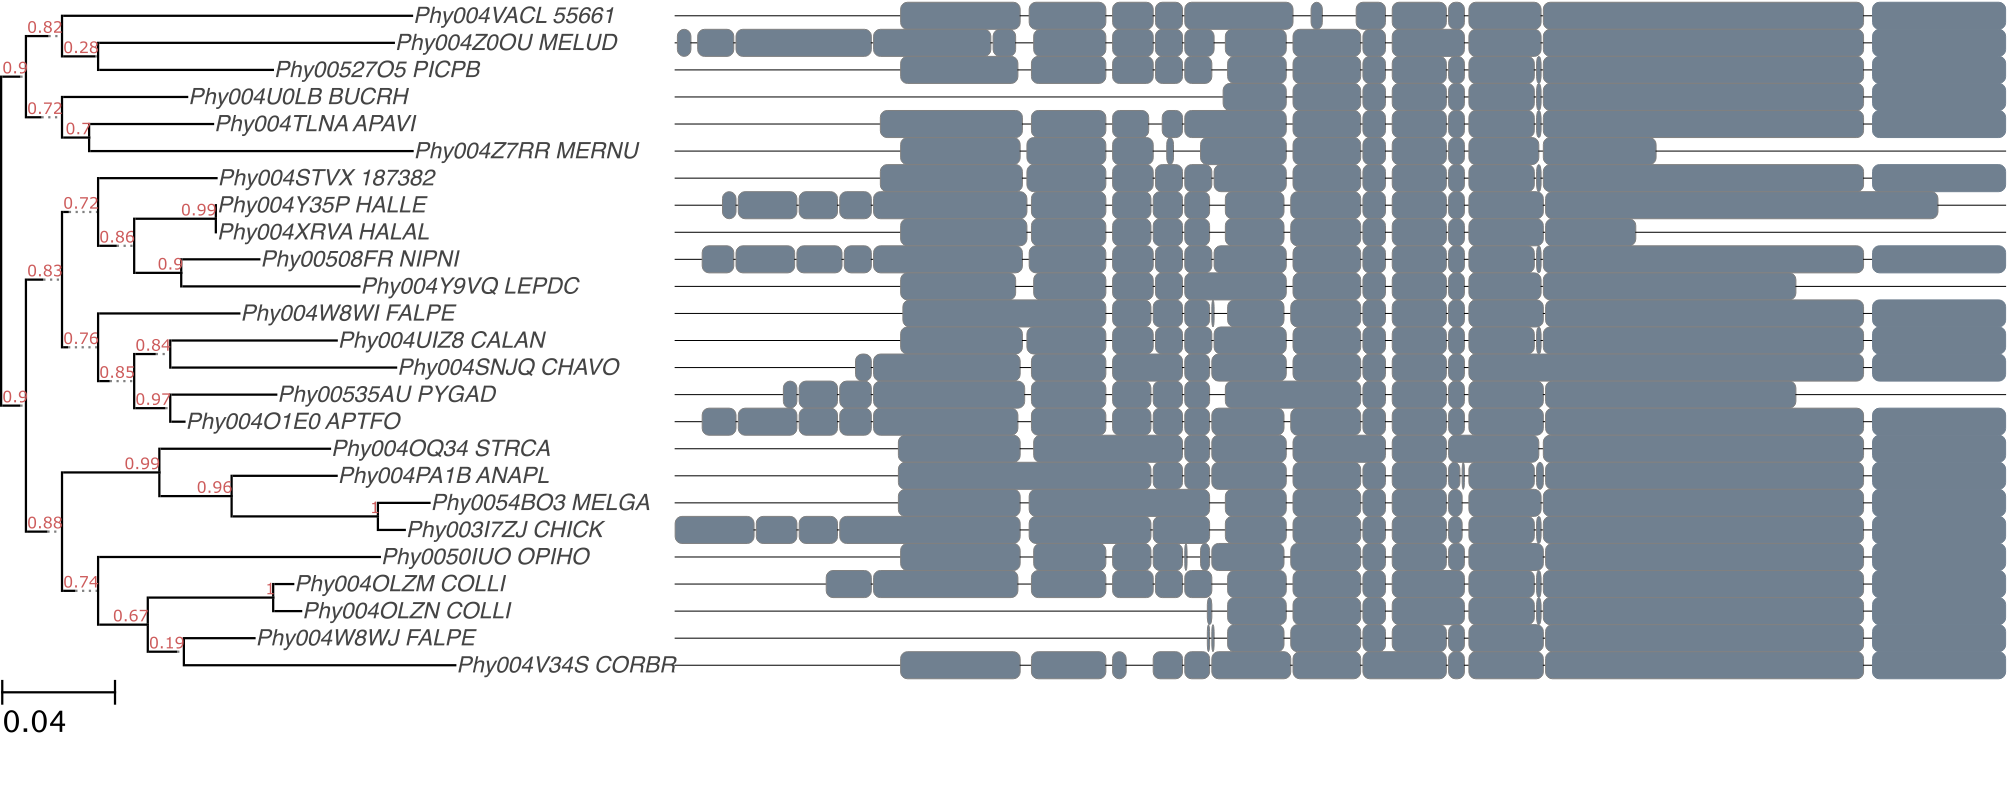

In [22]:
from IPython.display import Image
Image(filename='NUP62_tree/clustalo_default-none-none-fasttree_full/NUP62.aa.fa.final_tree.png')

You can also have a quick look at the resulting tree from your terminal using `ete3 view --text` 

In [23]:
%%bash
ete3 view --text -t NUP62_tree/clustalo_default-none-none-fasttree_full/NUP62.aa.fa.final_tree.nw


         /-Phy004VACL_55661
      /-|
     |  |   /-Phy004Z0OU_MELUD
     |   \-|
   /-|      \-Phy00527O5_PICPB
  |  |
  |  |   /-Phy004U0LB_BUCRH
  |   \-|
  |     |   /-Phy004TLNA_APAVI
  |      \-|
  |         \-Phy004Z7RR_MERNU
  |
  |         /-Phy004STVX_187382
  |        |
  |      /-|      /-Phy004Y35P_HALLE
  |     |  |   /-|
--|     |  |  |   \-Phy004XRVA_HALAL
  |     |   \-|
  |     |     |   /-Phy00508FR_NIPNI
  |   /-|      \-|
  |  |  |         \-Phy004Y9VQ_LEPDC
  |  |  |
  |  |  |   /-Phy004W8WI_FALPE
  |  |  |  |
  |  |   \-|      /-Phy004UIZ8_CALAN
  |  |     |   /-|
  |  |     |  |   \-Phy004SNJQ_CHAVO
  |  |      \-|
   \-|        |   /-Phy00535AU_PYGAD
     |         \-|
     |            \-Phy004O1E0_APTFO
     |
     |      /-Phy004OQ34_STRCA
     |   /-|
     |  |  |   /-Phy004PA1B_ANAPL
     |  |   \-|
     |  |     |   /-Phy0054BO3_MELGA
      \-|      \-|
        |         \-Phy003I7ZJ_CHICK
        |
        |   /-Phy0050IUO_OPIHO
        |  |
         \-

or open an interactive interface to browse it: 

     `ete3 view -t NUP62_tree/clustalo_default-none-none-fasttree_full/NUP62.aa.fa.final_tree.nw`

or even generate an SVG figure from the command line

In [50]:
%%bash 
ete3 view --image tree.svg -t NUP62_tree/clustalo_default-none-none-fasttree_full/NUP62.aa.fa.final_tree.nw 

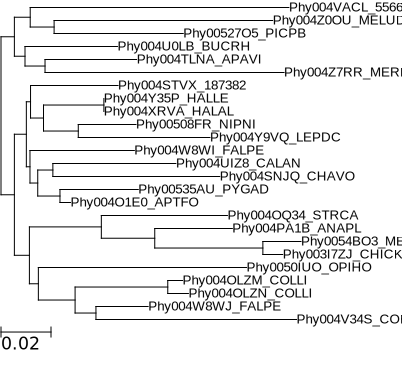

In [63]:
from IPython.display import SVG
SVG(filename='t0.tree.svg')

### 6. Load tree and alignment using the ete3 API for further analysis 

remember that the Python API allows you to do much more, from rooting, traversing or node manipulation to custom visualization. 

Load the tree using the `ete3` Python module, and operate with it as a Python object.

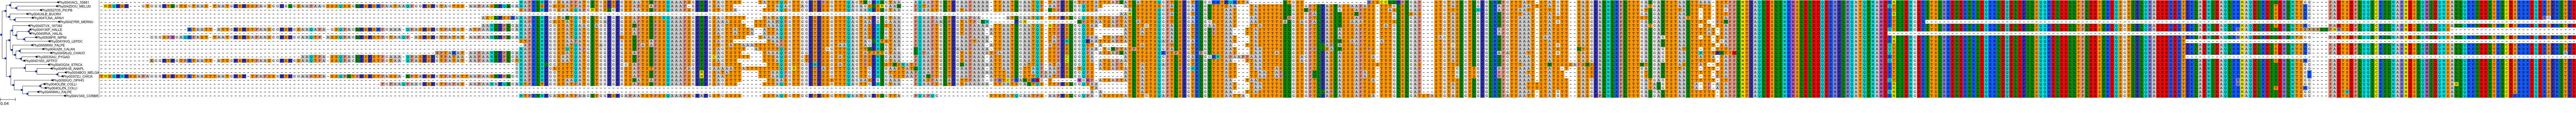

In [61]:
from ete3 import PhyloTree
tree = PhyloTree("NUP62_tree/clustalo_default-none-none-fasttree_full/NUP62.aa.fa.final_tree.nw")
tree.link_to_alignment("NUP62_tree/clustalo_default-none-none-fasttree_full/NUP62.aa.fa.final_tree.used_alg.fa")
tree.render("%%inline")

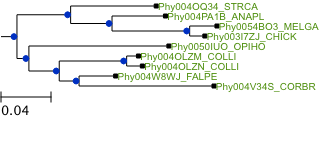

In [60]:
tree.get_common_ancestor("Phy004W8WJ_FALPE", "Phy004OQ34_STRCA").render("%%inline", layout="basic")